# Putting all together: Platinum electrode vs Stainless Steel electrode

**Comparative LCA | Contribution Analysis | Monte Carlo Simulation**

Comparative LCA on the production and use of a Platinum and a Stainless Steel electrode in Microbial Electrlysis Cells for wastewater treatment and hydrogen gas production.



In [100]:
import brightway2 as bw

import os               # to use "operating system dependent functionality"
import numpy as np      # "the fundamental package for scientific computing with Python"
import pandas as pd     # "high-performance, easy-to-use data structures and data analysis tools" for Python
from matplotlib import pyplot as plt
from scipy import stats

In [101]:
bw.projects.set_current("LCA2022") #you can set the project you created in Day 1 

In [102]:
bw.databases # you should then already have the biosphere3, ecoinvent and the databases we created during the session today

Databases dictionary with 10 object(s):
	Bottle_DB
	Compounds_DB
	DB_NAME
	Electrodes_DB
	Gasoline_DB
	LCstages_DB
	Marker_DB
	Window_DB
	biosphere3
	ecoinvent 3.8 cutoff

## Solution

Remember to start with importing the necessary packages and setting up a project:)

In [103]:
ei38 = bw.Database('ecoinvent 3.8 cutoff')
bio = bw.Database('biosphere3')

### prepare Excel File

In [105]:
imp = bw.ExcelImporter("Electrodes.xlsx")
imp.apply_strategies()
imp.match_database("ecoinvent 3.8 cutoff", fields=('name','unit','location'))
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()

Extracted 1 worksheets in 0.07 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 26.22 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
2 datasets
8 exchanges
0 unlinked exchanges
  


(2, 8, 0)

In [106]:
imp.write_database()

Writing activities to SQLite3 database:
0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/11/2023 22:01:58
  Finished: 12/11/2023 22:01:58
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 3.44
Created database: Electrodes_DB


In [107]:
bw.databases

Databases dictionary with 10 object(s):
	Bottle_DB
	Compounds_DB
	DB_NAME
	Electrodes_DB
	Gasoline_DB
	LCstages_DB
	Marker_DB
	Window_DB
	biosphere3
	ecoinvent 3.8 cutoff

In [108]:
electrodes_DB = bw.Database("Electrodes_DB")

### Comparative LCA

In [109]:
Platinum = electrodes_DB.get('Pt_activity')

In [110]:
StainlessSteel = electrodes_DB.get('SS_activity')

In [111]:
methods= bw.methods

In [112]:
GWP = [m for m in methods if 'climate change' in str(m) 
       and 'GWP' in str(m)
       and 'ReCiPe Midpoint (E)' in str(m)
       and not 'obsolete' in str(m)
      ][0]
GWP

('ReCiPe Midpoint (E) V1.13 no LT', 'climate change', 'GWP500')

In [113]:
AP = [m for m in methods if 'acidification' in str(m) 
       and not 'obsolete' in str(m) 
       and 'ReCiPe Midpoint (E)' in str(m)
       and 'LT' in str(m)
          ][0]
AP

('ReCiPe Midpoint (E) V1.13 no LT', 'terrestrial acidification', 'TAP500')

In [114]:
EP = [m for m in methods if 'eutrophication' in str(m) 
       and not 'obsolete' in str(m)
       and 'fresh' in str(m)
       and 'ReCiPe Midpoint (E)' in str(m)
          ][0]
EP

('ReCiPe Midpoint (E) V1.13 no LT', 'freshwater eutrophication', 'FEP')

In [115]:
HT = [m for m in methods if 'human' in str(m) 
       and not 'obsolete' in str(m)
       and 'toxicity' in str(m)
       and 'ReCiPe Midpoint (E)' in str(m)
          ][0]
HT

('ReCiPe Midpoint (E) V1.13 no LT', 'human toxicity', 'HTPinf')

In [116]:
OD = [m for m in methods if 'ozone' in str(m) 
       and 'depletion' in str(m)
       and 'ReCiPe Midpoint (E)' in str(m)
          ][0]
OD

('ReCiPe Midpoint (E) V1.13 no LT', 'ozone depletion', 'ODPinf')

In [117]:
POFP = [m for m in methods if 'photochemical' in str(m) 
       and not 'obsolete' in str(m)
       and 'oxidant' in str(m)
       and 'ReCiPe Midpoint (E)' in str(m)
          ][0]
POFP

('ReCiPe Midpoint (E) V1.13 no LT', 'photochemical oxidant formation', 'POFP')

In [118]:
choosen_methods = [GWP,AP,EP,HT,OD,POFP]
functional_units =[{Platinum:1},{StainlessSteel:1}]

In [119]:
bw.calculation_setups['comparison'] = {'inv': functional_units, 'ia': choosen_methods}

In [120]:
mlca = bw.MultiLCA('comparison')
mlca.results

array([[1.80651254e+00, 1.79050950e-02, 1.14418766e-04, 5.33309125e+00,
        5.53804353e-08, 8.38410782e-03],
       [1.69978422e-02, 6.39880244e-05, 8.14001880e-07, 5.57215736e-02,
        5.16472092e-10, 8.82696532e-05]])

In [121]:
activity_list = [Platinum, StainlessSteel]
activity_list = [ x['name'] for x in activity_list ]
activity_list

['Pt_activity', 'SS_activity']

In [122]:
df_results = pd.DataFrame(index=activity_list, columns=choosen_methods, data=mlca.results)
df_results

,"(ReCiPe Midpoint (E) V1.13 no LT, climate change, GWP500)","(ReCiPe Midpoint (E) V1.13 no LT, terrestrial acidification, TAP500)","(ReCiPe Midpoint (E) V1.13 no LT, freshwater eutrophication, FEP)","(ReCiPe Midpoint (E) V1.13 no LT, human toxicity, HTPinf)","(ReCiPe Midpoint (E) V1.13 no LT, ozone depletion, ODPinf)","(ReCiPe Midpoint (E) V1.13 no LT, photochemical oxidant formation, POFP)"
Pt_activity,1.806513,0.017905,1.144188e-04,5.333091,5.538044e-08,0.008384
SS_activity,0.016998,0.000064,8.140019e-07,0.055722,5.164721e-10,0.000088


### Contributional Analysis

In [123]:
from bw2analyzer import ContributionAnalysis

In [124]:
methods = [GWP,AP,EP,HT,OD,POFP]
string_methods = ['GWP','AP','EP','HT','OD','POFP']

LCA_Pt_activity = []

LCA_SS_activity = []

Pt_activity = electrodes_DB.get('Pt_activity')
SS_activity = electrodes_DB.get('SS_activity')


In [125]:
for i in methods:
    Pt_activity_lca = bw.LCA({Pt_activity:1}, i)
    Pt_activity_lca.lci()
    Pt_activity_lca.lcia()
    LCA_Pt_activity.append(Pt_activity_lca.score)

    ContributionAnalysis().annotated_top_processes(Pt_activity_lca, limit=10)

print(LCA_Pt_activity)

[1.8065125394043444, 0.017905094994314384, 0.00011441876639455492, 5.333091248749325, 5.5380435332040356e-08, 0.008384107823487]


In [126]:
results_by_activity = (Pt_activity_lca.characterized_inventory.sum(axis=0)).A1
Pt_activity_lca_rev_act_dict, Pt_activity_lca_rev_product_dict, Pt_activity_lca_rev_bio_dict = Pt_activity_lca.reverse_dict()
list_of_names_in_columns = [bw.get_activity(Pt_activity_lca_rev_act_dict[col])['name'] 
                            for col in range(Pt_activity_lca.characterized_inventory.shape[1])]
pd.Series(index=list_of_names_in_columns, data=results_by_activity).sort_values(ascending=False).head(5)

blasting                                                                0.001652
blasting                                                                0.000816
electricity production, hard coal, conventional                         0.000744
platinum group metal mine operation, ore with high palladium content    0.000501
diesel, burned in building machine                                      0.000193
dtype: float64

In [127]:
for i in methods:
    SS_activity_lca = bw.LCA({SS_activity:1}, i)
    SS_activity_lca.lci()
    SS_activity_lca.lcia()
    LCA_SS_activity.append(SS_activity_lca.score)

    ContributionAnalysis().annotated_top_processes(SS_activity_lca, limit=10)

print(LCA_SS_activity)

[0.01699784215785867, 6.398802441815425e-05, 8.140018796591395e-07, 0.055721573619649925, 5.164720924002316e-10, 8.826965319627305e-05]


In [128]:
results_by_activity = (SS_activity_lca.characterized_inventory.sum(axis=0)).A1
SS_activity_lca_rev_act_dict, SS_activity_lca_rev_product_dict, SS_activity_lca_rev_bio_dict = SS_activity_lca.reverse_dict()
list_of_names_in_columns = [bw.get_activity(SS_activity_lca_rev_act_dict[col])['name'] 
                            for col in range(SS_activity_lca.characterized_inventory.shape[1])]
pd.Series(index=list_of_names_in_columns, data=results_by_activity).sort_values(ascending=False).head(5)

coking                                                 0.000034
iron sinter production                                 0.000011
transport, freight, sea, bulk carrier for dry goods    0.000009
blasting                                               0.000003
diesel, burned in building machine                     0.000003
dtype: float64

### Monte Carlo Simulation

In [129]:
demand2 = [{Platinum:1},{StainlessSteel:1}]
choosen_methods

[('ReCiPe Midpoint (E) V1.13 no LT', 'climate change', 'GWP500'),
 ('ReCiPe Midpoint (E) V1.13 no LT', 'terrestrial acidification', 'TAP500'),
 ('ReCiPe Midpoint (E) V1.13 no LT', 'freshwater eutrophication', 'FEP'),
 ('ReCiPe Midpoint (E) V1.13 no LT', 'human toxicity', 'HTPinf'),
 ('ReCiPe Midpoint (E) V1.13 no LT', 'ozone depletion', 'ODPinf'),
 ('ReCiPe Midpoint (E) V1.13 no LT',
  'photochemical oxidant formation',
  'POFP')]

In [130]:
mc = bw.MonteCarloLCA(demand2[0], GWP)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_GWP2 = pd.DataFrame(simulations, columns =['Platinum', 'StainlessSteel'])

df_GWP2

,Platinum,StainlessSteel
0,1.848818,0.017142
1,1.948043,0.018727
2,2.018322,0.017383
3,2.023374,0.020110
4,1.903325,0.017160
5,2.274199,0.019250
6,2.024074,0.016744
7,1.742971,0.016377
8,1.781125,0.018608
9,1.782626,0.017616


In [131]:
mc = bw.MonteCarloLCA(demand2[0], AP)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_AP = pd.DataFrame(simulations, columns =['Platinum', 'StainlessSteel'])
df_AP

,Platinum,StainlessSteel
0,0.016918,0.000091
1,0.016968,0.000069
2,0.020445,0.000080
3,0.017653,0.000071
4,0.022872,0.000067
5,0.019530,0.000077
6,0.023932,0.000084
7,0.017433,0.000073
8,0.018694,0.000061
9,0.018617,0.000069


In [132]:
mc = bw.MonteCarloLCA(demand2[0], EP)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_EP = pd.DataFrame(simulations, columns =['Platinum', 'StainlessSteel'])
df_EP

,Platinum,StainlessSteel
0,0.000169,9.501421e-07
1,0.000186,1.824305e-06
2,0.000144,8.235156e-07
3,0.000027,1.839459e-07
4,0.000062,1.838310e-07
5,0.000146,9.858467e-07
6,0.000083,6.545912e-07
7,0.000269,1.072897e-06
8,0.000087,7.407371e-07
9,0.000206,1.501439e-06


In [133]:
mc = bw.MonteCarloLCA(demand2[0], HT)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_HT = pd.DataFrame(simulations, columns =['Platinum', 'StainlessSteel'])
df_HT

,Platinum,StainlessSteel
0,13.975177,0.170949
1,5.543667,0.145803
2,10.697814,0.052056
3,5.530712,0.059209
4,10.223980,0.078018
5,9.186841,0.066660
6,10.813156,0.073391
7,7.358229,0.469836
8,7.932841,0.173703
9,5.800268,0.101675


In [134]:
mc = bw.MonteCarloLCA(demand2[0], OD)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_OD = pd.DataFrame(simulations, columns =['Platinum', 'StainlessSteel'])
df_OD

,Platinum,StainlessSteel
0,1.386452e-07,1.376538e-09
1,6.361300e-08,6.337450e-10
2,7.286463e-08,7.918197e-10
3,1.156062e-07,7.428331e-10
4,6.750593e-08,7.266034e-10
5,8.974107e-08,9.867081e-10
6,8.063980e-08,8.347409e-10
7,7.554380e-08,1.051696e-09
8,5.884574e-08,5.230014e-10
9,8.447230e-08,5.728627e-10


In [135]:
mc = bw.MonteCarloLCA(demand2[0], POFP)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_POFP = pd.DataFrame(simulations, columns =['Platinum', 'StainlessSteel'])
df_POFP

,Platinum,StainlessSteel
0,0.010143,0.000106
1,0.010530,0.000076
2,0.009136,0.000103
3,0.007948,0.000157
4,0.008981,0.000116
5,0.010167,0.000089
6,0.009458,0.000143
7,0.008398,0.000112
8,0.009155,0.000116
9,0.008249,0.000095


### Visualization of Results (Table, Box Plot)

In [136]:
# GWP
df_GWP2.describe()

,Platinum,StainlessSteel
count,20.000000,20.000000
mean,1.941508,0.018066
std,0.121757,0.001052
min,1.742971,0.016377
25%,1.867571,0.017327
50%,1.957658,0.017870
75%,2.023549,0.018753
max,2.274199,0.020110


In [137]:
# AP
df_AP.describe()

,Platinum,StainlessSteel
count,20.000000,20.000000
mean,0.019214,0.000078
std,0.001997,0.000012
min,0.016918,0.000059
25%,0.017663,0.000071
50%,0.018754,0.000078
75%,0.019908,0.000081
max,0.023932,0.000115


In [138]:
# EP
df_EP.describe()

,Platinum,StainlessSteel
count,20.000000,2.000000e+01
mean,0.000153,1.028305e-06
std,0.000079,5.820021e-07
min,0.000027,1.838310e-07
25%,0.000086,7.192006e-07
50%,0.000148,9.679944e-07
75%,0.000195,1.320009e-06
max,0.000292,2.150067e-06


In [139]:
# HT
df_HT.describe()

,Platinum,StainlessSteel
count,20.000000,20.000000
mean,8.742151,0.119789
std,2.342435,0.094961
min,5.461786,0.052056
25%,7.306982,0.068569
50%,8.564396,0.089462
75%,10.624958,0.130947
max,13.975177,0.469836


In [140]:
# OD
df_OD.describe()

,Platinum,StainlessSteel
count,2.000000e+01,2.000000e+01
mean,8.484071e-08,7.981917e-10
std,3.597715e-08,2.502635e-10
min,5.480854e-08,5.230014e-10
25%,6.509696e-08,5.806618e-10
50%,7.416854e-08,7.283239e-10
75%,8.588929e-08,1.002955e-09
max,2.098193e-07,1.376538e-09


In [141]:
# POFP
df_POFP.describe()

,Platinum,StainlessSteel
count,20.000000,20.000000
mean,0.009186,0.000116
std,0.000816,0.000027
min,0.007948,0.000076
25%,0.008710,0.000098
50%,0.009030,0.000114
75%,0.009630,0.000128
max,0.010741,0.000193


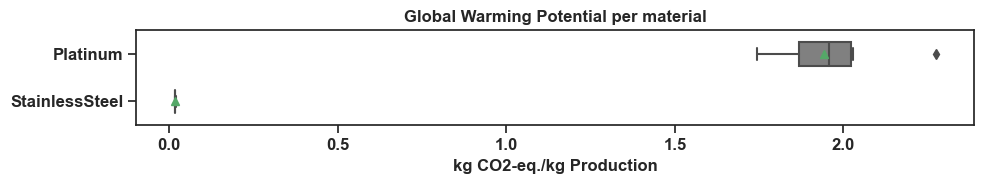

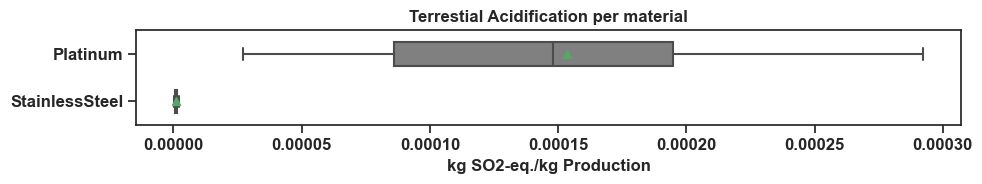

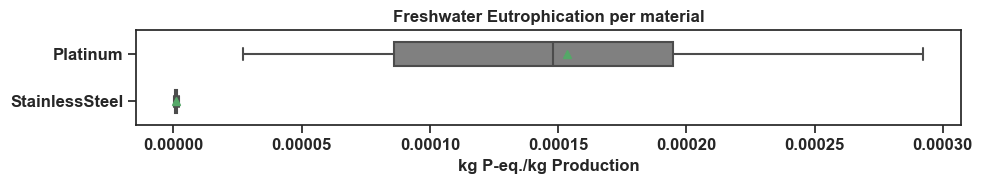

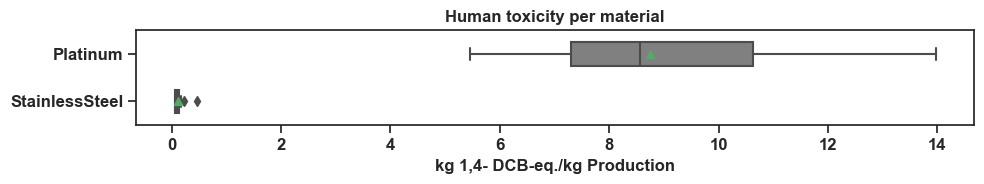

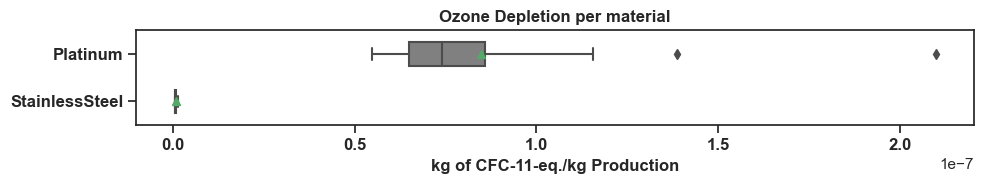

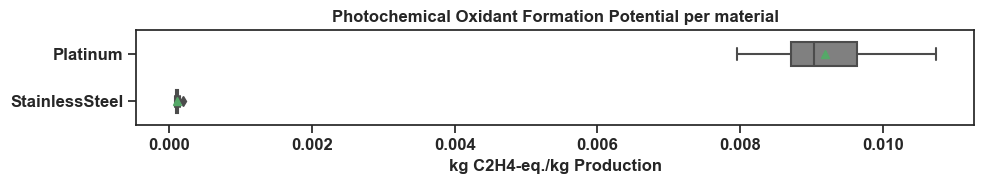

In [142]:
import seaborn as sns
from matplotlib import rcParams

font = {'fontsize': 12,
        'fontweight': 'bold',
        'horizontalalignment': 'center'}

rcParams.update({'figure.autolayout': True})
sns.set(style="ticks")

mypal = {"Platinum": "gray",
         "StainlessSteel": "blue"}

# Plot for df_GWP2
plt.figure(figsize=(10, 2))
plt.tick_params(axis='both', which='both', labelsize=14, labelbottom=True)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title('Global Warming Potential per material', fontdict=font)
plt.xlabel("kg CO2-eq./kg Production", fontdict=font)
bplot_gwp = sns.boxplot(data=df_GWP2, width=0.5, notch=False, showmeans=True, orient="h", palette=mypal)

# Plot for df_AP
plt.figure(figsize=(10, 2))
plt.tick_params(axis='both', which='both', labelsize=14, labelbottom=True)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title('Terrestial Acidification per material', fontdict=font)
plt.xlabel("kg SO2-eq./kg Production", fontdict=font)
bplot_ap = sns.boxplot(data=df_EP, width=0.5, notch=False, showmeans=True, orient="h", palette=mypal)

# Plot for df_EP
plt.figure(figsize=(10, 2))
plt.tick_params(axis='both', which='both', labelsize=14, labelbottom=True)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title('Freshwater Eutrophication per material', fontdict=font)
plt.xlabel("kg P-eq./kg Production", fontdict=font)
bplot_ep = sns.boxplot(data=df_EP, width=0.5, notch=False, showmeans=True, orient="h", palette=mypal)

# Plot for df_HT
plt.figure(figsize=(10, 2))
plt.tick_params(axis='both', which='both', labelsize=14, labelbottom=True)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title('Human toxicity per material', fontdict=font)
plt.xlabel("kg 1,4- DCB-eq./kg Production", fontdict=font)
bplot_ht = sns.boxplot(data=df_HT, width=0.5, notch=False, showmeans=True, orient="h", palette=mypal)

# Plot for df_OD
plt.figure(figsize=(10, 2))
plt.tick_params(axis='both', which='both', labelsize=14, labelbottom=True)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title('Ozone Depletion per material', fontdict=font)
plt.xlabel("kg of CFC-11-eq./kg Production", fontdict=font)
bplot_od = sns.boxplot(data=df_OD, width=0.5, notch=False, showmeans=True, orient="h", palette=mypal)

# Plot for df_POFP
plt.figure(figsize=(10, 2))
plt.tick_params(axis='both', which='both', labelsize=14, labelbottom=True)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title('Photochemical Oxidant Formation Potential per material', fontdict=font)
plt.xlabel("kg C2H4-eq./kg Production", fontdict=font)
bplot_pofd = sns.boxplot(data=df_POFP, width=0.5, notch=False, showmeans=True, orient="h", palette=mypal)

plt.show()